# Tweets download

In [1]:
import os
from TweetsDownloader import TweetsDownloader

### Hyperparameters

In [6]:
BASE_PATH = 'c:/Users/leona/Downloads/tweets/'
BASE_FILENAME = 'flu_tweets'
keywords = ['febbre', 'brividi', 'dolori alle ossa', 'dolori muscolari', 'malessere generale', 
            'mal di testa', 'mal di gola', 'raffreddore', 'tosse', 'congiuntivite']
dates_range = ('2019-01-01', '2019-02-01')

### Download

In [7]:
td = TweetsDownloader(language='it', max_results_per_request=500, sleep_time=3)

In [8]:
td.download(keywords, dates_range, BASE_PATH + BASE_FILENAME)

### Fixing and merging files

In [9]:
files = [BASE_PATH + f for f in os.listdir(BASE_PATH)]
td.merge_tweets(files, BASE_PATH + BASE_FILENAME)

# Google trends download

In [1]:
import importlib
import GoogleTrendsDownloader
importlib.reload(GoogleTrendsDownloader)

<module 'GoogleTrendsDownloader' from 'C:\\Users\\leona\\Google Drive\\Università\\5\\Stage\\codice\\tweets-analysis\\GoogleTrendsDownloader.py'>

In [2]:
### keywords (kw_list)
# up to 5 different keywords

### categories (cat)
# - "health" -> 45
#    - "health conditions" -> 419
#       - "cold&flu" -> 629

### timezone (tz)
# central european -> +60

### search type (gprop)
# default to web searches
# can be images, news, youtube, froogle (google shopping)

### time (timeframe)
# ...

### place (geo)
# ...

In [3]:
kw_list = ['febbre', 'mal di testa', 'mal di gola', 'raffreddore', 'tosse']
cat = 629

In [4]:
gtd = GoogleTrendsDownloader.GoogleTrendsDownloader('IT', -60, kw_list, cat, 'today 5-y')

In [5]:
df = gtd.interest_over_time()
df

,febbre,mal di testa,mal di gola,raffreddore,tosse,isPartial
date,,,,,,
2017-05-14,9,0,0,0,13,False
2017-05-21,10,0,0,1,9,False
2017-05-28,8,0,0,1,11,False
2017-06-04,5,0,0,1,9,False
2017-06-11,7,0,0,0,9,False
...,...,...,...,...,...,...
2022-04-03,23,1,0,3,22,False
2022-04-10,17,0,0,4,34,False
2022-04-17,20,0,0,3,32,False


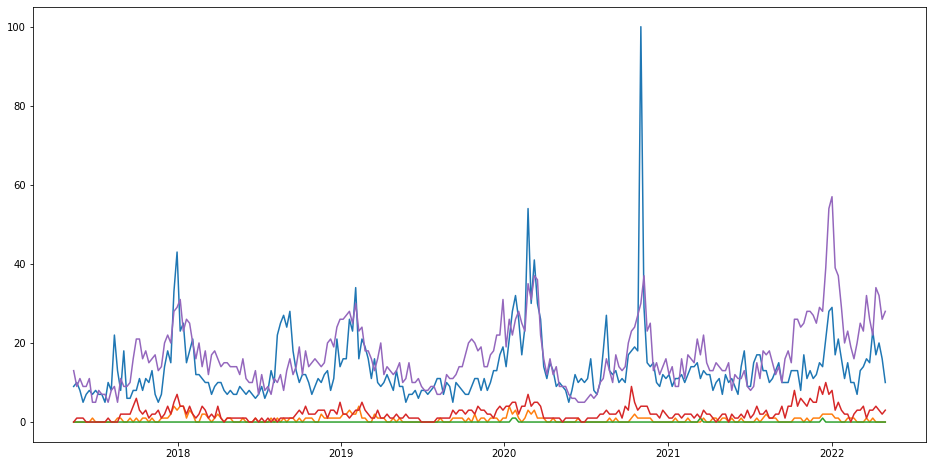

In [7]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (16,8)
for k in kw_list:
    plt.plot(df[[k]])
plt.show()

In [10]:
gtd.interest_by_region()

,febbre,mal di testa,mal di gola,raffreddore,tosse
geoName,,,,,
Abruzzo,43,1,0,7,49
Basilicata,31,2,0,7,60
Calabria,40,2,0,5,53
Campania,43,2,0,6,49
Emilia-Romagna,40,1,0,8,51
Friuli-Venezia Giulia,45,2,0,8,45
Lazio,50,2,0,6,42
Liguria,37,1,0,7,55
Lombardia,33,2,0,7,58
